### Chapter 3. Linear and Logistic Regression with TensorFlow

In [1]:
import tensorflow as tf

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow **without** Eager

In [2]:
a = tf.ones((2, 2))
b = tf.matmul(a, a)
with tf.Session() as sess:
    print(sess.run(b))

[[2. 2.]
 [2. 2.]]


TensorFlow with Eager

In [3]:
tf.enable_eager_execution()

tf.executing_eagerly()      
a = tf.ones((2, 2))
b = tf.matmul(a, a)
print(b.numpy())

ValueError: tf.enable_eager_execution must be called at program startup.

### Learning with TensorFlow

In [2]:
import numpy as np

In [3]:
# Generate synthetic data
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)

noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.reshape(w_true * x_np + b_true + noise, (-1))

In [4]:
noise.shape

(100, 1)

In [5]:
y_np.shape

(100,)

In [6]:
y_np[:10]

array([5.18175572, 2.83886481, 6.47964086, 3.01911277, 6.74831299,
       5.48370025, 5.46360334, 2.38200281, 6.85954026, 6.13493042])

In [7]:
noise[:10]

array([[-0.04065246],
       [ 0.02093832],
       [ 0.05628597],
       [ 0.16619514],
       [-0.06617736],
       [ 0.02862734],
       [-0.12137265],
       [-0.1068516 ],
       [ 0.10262571],
       [ 0.01358497]])

In [8]:
import matplotlib.pyplot as plt

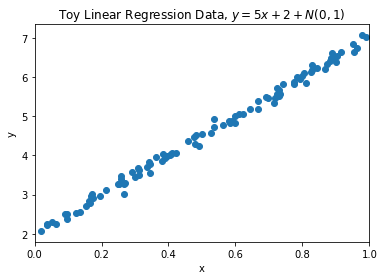

In [9]:
# Save image of the data distribution

plt.scatter(x_np, y_np)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.title("Toy Linear Regression Data, "r"$y = 5x + 2 + N(0, 1)$")
plt.savefig("lr_data.png")

In [10]:
# Generate synthetic data
N = 100

# Zeros form a Gaussian centered at (-1, -1)
# epsilon is .1
x_zeros = np.random.multivariate_normal(mean=np.array((-1, -1), dtype=int), cov=np.eye(2, dtype=int), size=(N//2,))
y_zeros = np.zeros((N//2,))

# Ones form a Gaussian centered at (1, 1)
# epsilon is .1
x_ones = np.random.multivariate_normal(mean=np.array((1, 1)), cov=.1*np.eye(2), size=(N//2,))
y_ones = np.ones((N//2,))

x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])

In [11]:
x_zeros.shape

(50, 2)

In [12]:
x_ones.shape

(50, 2)

In [13]:
x_np.shape

(100, 2)

In [14]:
y_zeros.shape

(50,)

In [38]:
y_ones.shape

(50,)

In [39]:
y_np.shape

(100,)

In [42]:
y_np

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

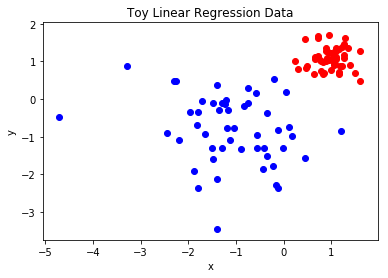

In [45]:
# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Toy Linear Regression Data")

plt.savefig("logistic_data.png")

### New TensorFlow Concepts

In [47]:
tf.placeholder(tf.float32, shape=(2,2))

<tf.Tensor 'Placeholder:0' shape=(2, 2) dtype=float32>

In [48]:
a = tf.placeholder(tf.float32, shape=(1,))
b = tf.placeholder(tf.float32, shape=(1,))
c = a + b
c

<tf.Tensor 'add:0' shape=(1,) dtype=float32>

In [49]:
a

<tf.Tensor 'Placeholder_1:0' shape=(1,) dtype=float32>

In [50]:
b

<tf.Tensor 'Placeholder_2:0' shape=(1,) dtype=float32>

In [51]:
with tf.Session() as sess:
    c_eval = sess.run(c, {a: [1.], b: [2.]})
    print(c_eval)

[3.]


In [53]:
c.op

<tf.Operation 'add' type=Add>

In [54]:
with tf.Session() as sess:
    c_eval = c.eval({a: [1.], b: [2.]})
    print(c_eval)

[3.]


In [55]:
N = 5
with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N, 1))
    y = tf.placeholder(tf.float32, (N,))
x

<tf.Tensor 'placeholders/Placeholder:0' shape=(5, 1) dtype=float32>

In [ ]:
learning_rate = .001
with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(l)

In [56]:
W = tf.Variable((3,))
>>> l = tf.reduce_sum(W)
>>> gradW = tf.gradients(l, W)
>>> gradW

[<tf.Tensor 'gradients/Sum_grad/Tile:0' shape=(1,) dtype=int32>]

#### SUMMARIES AND FILE WRITERS FOR TENSORBOARD

In [ ]:
with tf.name_scope("summaries"):
    tf.summary.scalar("loss", l)
    merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter('/tmp/lr-train', tf.get_default_graph())

#### TRAINING MODELS WITH TENSORFLOW

In [ ]:
n_steps = 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Train model
    for i in range(n_steps):
        feed_dict = {x: x_np, y: y_np}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, loss))
        train_writer.add_summary(summary, i)

## Training Linear and Logistic Models in TensorFlow

In [59]:
tf.random_normal((1, 1))

<tf.Tensor 'random_normal:0' shape=(1, 1) dtype=float32>

In [15]:
N=100

In [16]:
# Generate tensorflow graph
with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N, 2))
    y = tf.placeholder(tf.float32, (N,))

with tf.name_scope("weights"):
    # Note that x is a scalar, so W is a single learnable weight.
    W = tf.Variable(tf.random_normal((2, 1)))
    b = tf.Variable(tf.random_normal((1,)))

with tf.name_scope("prediction"):
    y_pred = tf.matmul(x, W) + b

with tf.name_scope("loss"):
    l = tf.reduce_sum((y - y_pred)**2)
    
# Add training op
with tf.name_scope("optim"):
    # Set learning rate to .001 as recommended above.
    train_op = tf.train.AdamOptimizer(.001).minimize(l)
    
with tf.name_scope("summaries"):
    tf.summary.scalar("loss", l)
    merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter('/tmp/lr-train', tf.get_default_graph())

In [31]:
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [32]:
def pearson_r2_score(y, y_pred):
    """Computes Pearson R^2 (square of Pearson correlation)."""
    return pearsonr(y, y_pred)[0]**2

def rms_score(y_true, y_pred):
    """Computes RMS error."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [39]:
n_steps = 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Train model
    for i in range(n_steps):
        feed_dict = {x: x_np, y: y_np}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, loss))
        train_writer.add_summary(summary, i)
        
    # Get weights
    w_final, b_final = sess.run([W, b])

    # Make Predictions
    y_pred_np = sess.run(y_pred, feed_dict={x: x_np})
        
y_pred_np = np.reshape(y_pred_np, -1)
r2 = pearson_r2_score(y_np, y_pred_np)
print("Pearson R^2: %f" % r2)
rms = rms_score(y_np, y_pred_np)
print("RMS: %f" % rms)

step 0, loss: 47342.718750
step 1, loss: 47238.875000
step 2, loss: 47135.312500
step 3, loss: 47031.683594
step 4, loss: 46928.187500
step 5, loss: 46824.960938
step 6, loss: 46721.820312
step 7, loss: 46618.703125
step 8, loss: 46515.835938
step 9, loss: 46413.195312
step 10, loss: 46310.519531
step 11, loss: 46208.253906
step 12, loss: 46105.742188
step 13, loss: 46003.765625
step 14, loss: 45901.816406
step 15, loss: 45800.042969
step 16, loss: 45698.449219
step 17, loss: 45596.921875
step 18, loss: 45495.687500
step 19, loss: 45394.257812
step 20, loss: 45293.238281
step 21, loss: 45192.515625
step 22, loss: 45091.867188
step 23, loss: 44991.296875
step 24, loss: 44891.042969
step 25, loss: 44790.937500
step 26, loss: 44690.800781
step 27, loss: 44591.062500
step 28, loss: 44491.300781
step 29, loss: 44391.828125
step 30, loss: 44292.421875
step 31, loss: 44193.484375
step 32, loss: 44094.328125
step 33, loss: 43995.656250
step 34, loss: 43897.062500
step 35, loss: 43798.820312
st

In [41]:
y_pred_np

array([ 0.9817898 , -0.36203694, -0.08542389,  0.40483868,  1.2386503 ,
       -0.19740832, -0.11455667, -0.32873964,  0.1132696 , -0.6672922 ,
        0.83919746,  0.62182444,  0.39941612, -0.37620026, -0.71736056,
        0.7514019 ,  0.7175565 ,  0.7319519 , -0.53915364,  0.08564082,
       -0.02143991, -0.02051699, -0.8579679 , -0.07014984,  0.1993329 ,
        0.73754185,  0.1029312 , -0.01880336,  0.91389775, -0.07981193,
       -0.2805807 , -0.10170358, -0.17609191,  0.5801829 , -0.41269803,
        0.8740171 , -0.2279818 , -0.05835742, -0.21671015, -0.10408837,
        0.6249766 ,  0.43739292,  0.3498876 , -0.31019515,  0.29029208,
       -0.12522203, -0.20759064,  0.36398697, -0.27612305,  0.7152039 ,
        0.57498175,  0.755962  ,  0.6982634 ,  1.0359428 ,  0.8758505 ,
        0.7484901 ,  0.828894  ,  0.7591613 ,  0.9006707 ,  0.96355015,
        0.82326484,  0.6669822 ,  0.7596264 ,  0.8777227 ,  0.7261989 ,
        0.8859246 ,  1.0921686 ,  0.8528956 ,  0.790903  ,  0.91

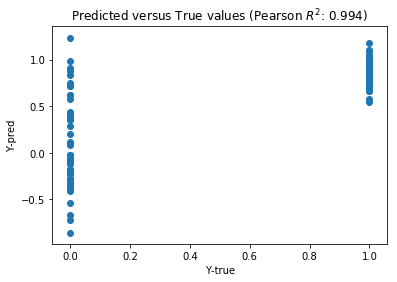

In [40]:
plt.xlabel("Y-true")
plt.ylabel("Y-pred")
plt.title("Predicted versus True values "
          r"(Pearson $R^2$: $0.994$)")
plt.scatter(y_np, y_pred_np)
plt.savefig("lr_pred.png")

#### VISUALIZING LINEAR REGRESSION MODELS WITH TENSORBOARD

In [21]:
! tensorboard --logdir=/tmp/lr-train

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-08-15 17:53:26.554161: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
W0815 17:53:26.570664 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0815 17:53:26.571692 Reloader tf_logging.py:121] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0815 17:53:26.573658 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a gr

#### Logistic Regression in TensorFlow

In [47]:
tf.reset_default_graph()

# Generate tensorflow graph
with tf.name_scope('logistic'):
    with tf.name_scope("placeholders"):
        # Note that our datapoints x are 2-dimensional.
        x = tf.placeholder(tf.float32, (N, 2))
        y = tf.placeholder(tf.float32, (N,))
    with tf.name_scope("weights"):
        W = tf.Variable(tf.random_normal((2, 1)))
        b = tf.Variable(tf.random_normal((1,)))
    
    with tf.name_scope("prediction"):
        y_logit = tf.squeeze(tf.matmul(x, W) + b)
        # the sigmoid gives the class probability of 1
        y_one_prob = tf.sigmoid(y_logit)
        # Rounding P(y=1) will give the correct prediction.
        y_pred = tf.round(y_one_prob)

    with tf.name_scope("loss"):
        # Compute the cross-entropy term for each datapoint
        entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
        # Sum all contributions
        l = tf.reduce_sum(entropy)
        
    with tf.name_scope("summaries"):
        tf.summary.scalar("loss", l)
        merged = tf.summary.merge_all()
        
    with tf.name_scope("optim"):
        train_op = tf.train.AdamOptimizer(.01).minimize(l)

        train_writer = tf.summary.FileWriter('/tmp/logistic-train', tf.get_default_graph())

In [49]:
n_steps = 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Train model
    for i in range(n_steps):
        feed_dict = {x: x_np, y: y_np}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        print("loss: %f" % loss)
        train_writer.add_summary(summary, i)
        
    # Get weights
    w_final, b_final = sess.run([W, b])

    # Make Predictions
    y_pred_np = sess.run(y_pred, feed_dict={x: x_np})

score = accuracy_score(y_np, y_pred_np)
print("Classification Accuracy: %f" % score)

loss: 56.666477
loss: 55.820042
loss: 54.988415
loss: 54.171757
loss: 53.370213
loss: 52.583870
loss: 51.812801
loss: 51.057037
loss: 50.316555
loss: 49.591297
loss: 48.881157
loss: 48.185986
loss: 47.505581
loss: 46.839706
loss: 46.188084
loss: 45.550388
loss: 44.926281
loss: 44.315403
loss: 43.717373
loss: 43.131821
loss: 42.558372
loss: 41.996681
loss: 41.446419
loss: 40.907276
loss: 40.378979
loss: 39.861271
loss: 39.353935
loss: 38.856773
loss: 38.369591
loss: 37.892239
loss: 37.424541
loss: 36.966362
loss: 36.517551
loss: 36.077961
loss: 35.647449
loss: 35.225872
loss: 34.813065
loss: 34.408871
loss: 34.013126
loss: 33.625671
loss: 33.246319
loss: 32.874908
loss: 32.511250
loss: 32.155163
loss: 31.806469
loss: 31.464981
loss: 31.130516
loss: 30.802896
loss: 30.481947
loss: 30.167490
loss: 29.859356
loss: 29.557377
loss: 29.261391
loss: 28.971243
loss: 28.686773
loss: 28.407839
loss: 28.134295
loss: 27.865995
loss: 27.602814
loss: 27.344620
loss: 27.091278
loss: 26.842672
loss: 26